## MAIN PROJECT-2

### Predicting Fuel Efficiency of Vehicles

#### importing nesscary libaries

In [110]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [111]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

Data = pd.read_csv("auto.data", names=cols, na_values = "?",
                comment = '\t', # once the program encounters a \t then the rest of the line would be ignored by the function
                sep= " ",
                skipinitialspace=True)

Data = Data.copy()

In [112]:
Data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


### DESCRIBING THE DATASET

### The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in 70s and 80s.

###### Our aim here is to predict the MPG value for a vehicle given we have other attributes of that vehicle.
###### Cylinders : Number of cylinders (can be treated as a numerical feature)
###### Displacement : Engine displacement in cubic inches (numerical)
###### Horsepower : Engine horsepower (numerical)
###### Weight : Vehicle weight (numerical)
###### Acceleration : Time to accelerate from 0 to 60 mph (numerical)
###### Model Year : The year the model was made (numerical, though it might also be considered a categorical feature if the year range is small)
###### Origin : Country of origin (categorical; you might need to encode this as numerical features if using it in regression)
###### MPG : Miles per gallon (a continuous variable that could be predicted based on other features)

In [113]:
# randomly choosing an 20 values from the dataset

Data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
294,34.1,4,86.0,65.0,1975.0,15.2,79,3
317,34.3,4,97.0,78.0,2188.0,15.8,80,2
241,22.0,6,146.0,97.0,2815.0,14.5,77,3
38,14.0,8,350.0,165.0,4209.0,12.0,71,1
264,18.1,8,302.0,139.0,3205.0,11.2,78,1
230,15.5,8,350.0,170.0,4165.0,11.4,77,1
200,18.0,6,250.0,78.0,3574.0,21.0,76,1
346,32.3,4,97.0,67.0,2065.0,17.8,81,3
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
211,16.5,6,168.0,120.0,3820.0,16.7,76,2


In [114]:
# to check the information on the datset

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [115]:
# checking the null values on the dataset

Data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [116]:
# to show the null set on the dataset by the table form

Data.isnull()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [117]:
# to find the shape of the dataset

Data.shape

(398, 8)

In [118]:
# removed the values NaN

rows_to_remove=[32]
Data=Data.drop(rows_to_remove)

In [119]:
# to show the top 5 rows

Data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [120]:
# removed the values NaN

rows_to_remove1=[354,374]
Data=Data.drop(rows_to_remove1)
remove=[126,330,336]
Data=Data.drop(remove)

In [121]:
# to show the last 5 rows

Data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [122]:
# summary Statistics of the dataset

Data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

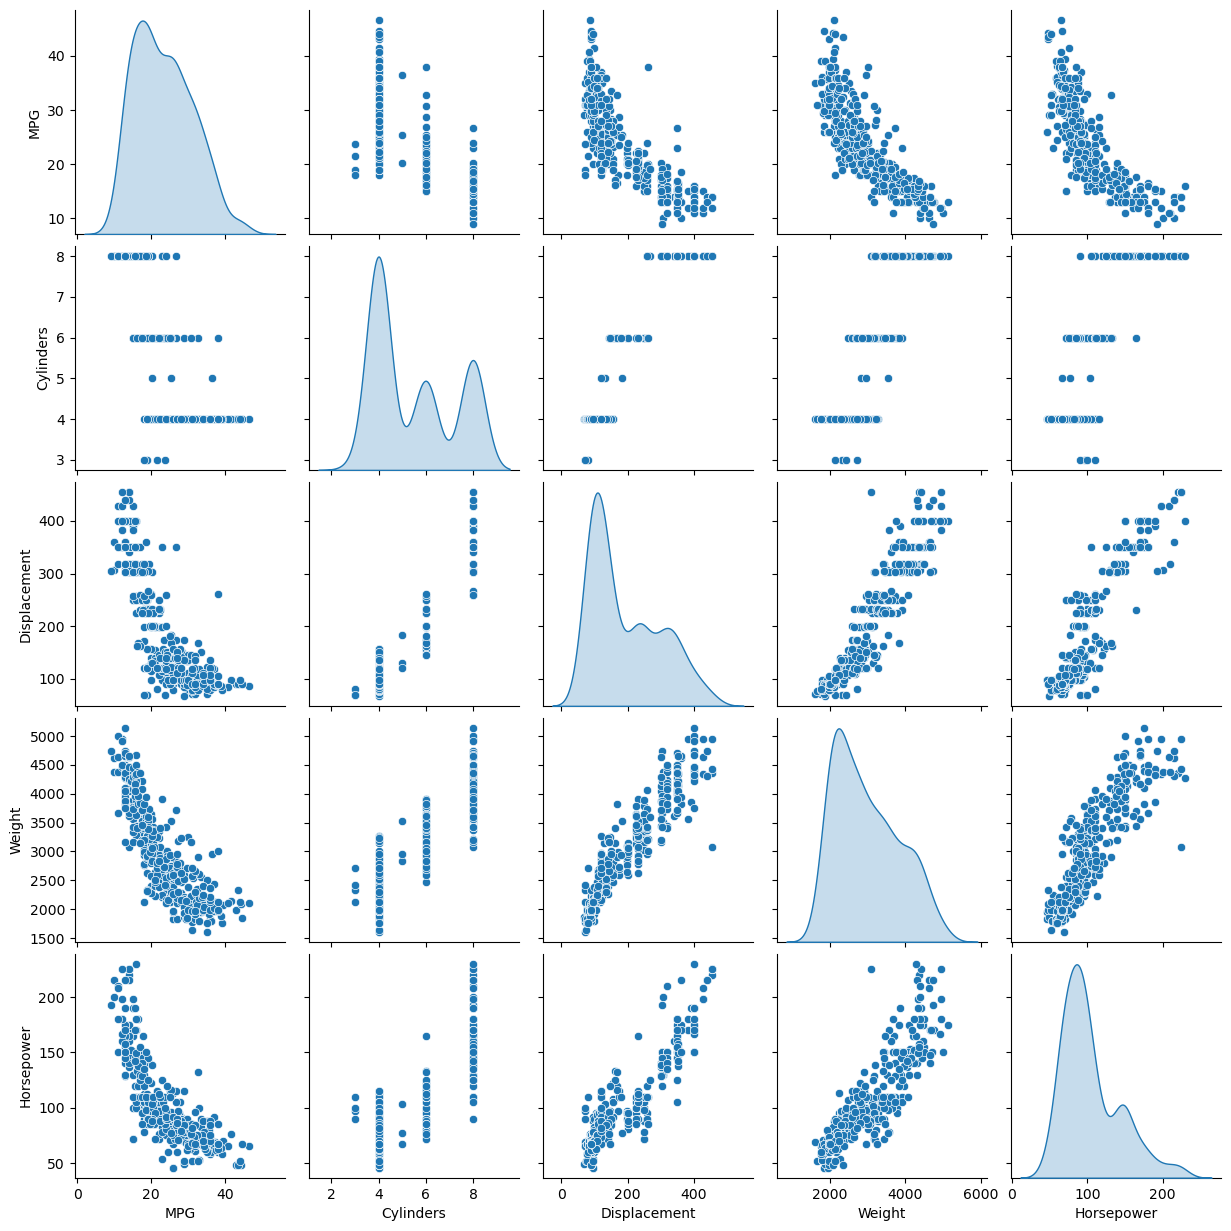

In [123]:
# pairplots to get an intuition of potential correlations

sns.pairplot(Data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

<Axes: xlabel='Horsepower'>

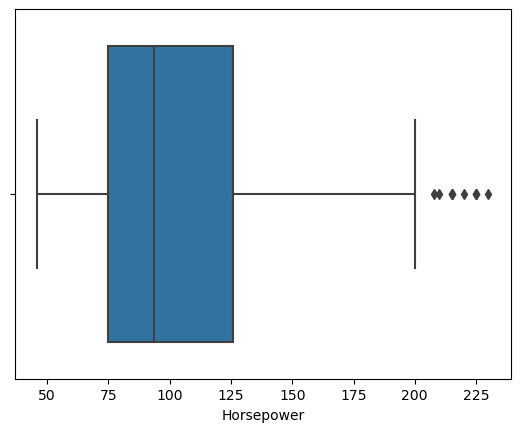

In [124]:
# presenting data of Horesepower by the help of boxplot

sns.boxplot(x = Data['Horsepower'])

[]

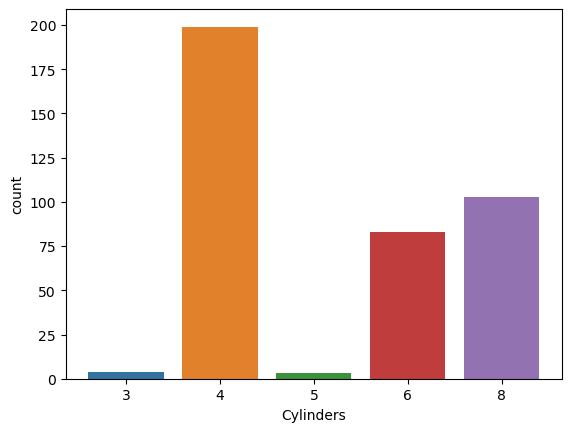

In [125]:
#this shows the countplot for the cylinders of the car

sns.countplot(x=Data["Cylinders"])
plt.plot()

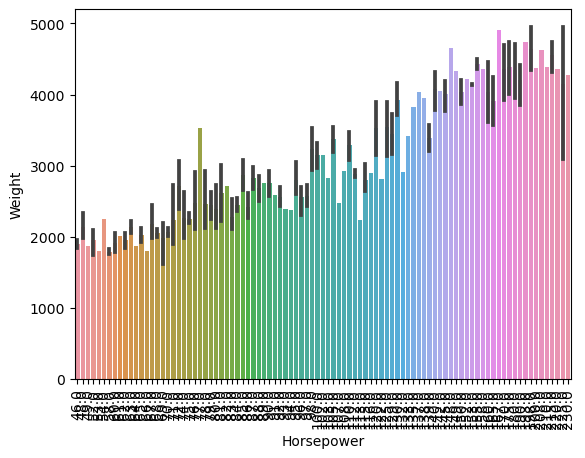

In [126]:
# this barplot is used to show the horsepower and the weight of the car

sns.barplot(x="Horsepower",y="Weight",data=Data)
plt.xticks(rotation=90)
plt.show()

[]

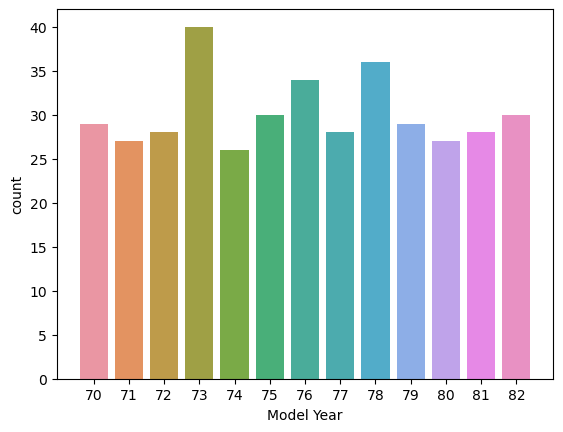

In [127]:
# to show all the year based vechile on the dataset

sns.countplot(x=Data["Model Year"])
plt.plot()

### DATA TRANSFORMATION

### CREATING INDEPENDANT AND DEPENDANT VARIABLES

In [128]:
x=Data[["Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]]
x

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [129]:
y=Data[["MPG"]]
y

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [130]:
# importing libiraies to train and test the dataset 

from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# used test size 0.3 to set an speed for the training data,and random state for randomly choosing the datas

In [132]:
x_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
110,4,108.0,94.0,2379.0,16.5,73,3
17,6,200.0,85.0,2587.0,16.0,70,1
320,4,119.0,92.0,2434.0,15.0,80,3
24,6,199.0,90.0,2648.0,15.0,70,1
128,6,250.0,100.0,3336.0,17.0,74,1
...,...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72,1
107,6,232.0,100.0,2789.0,15.0,73,1
272,4,151.0,85.0,2855.0,17.6,78,1
352,4,98.0,65.0,2380.0,20.7,81,1


In [133]:
y_train

,MPG
110,22.0
17,21.0
320,37.0
24,21.0
128,15.0
...,...
72,15.0
107,18.0
272,23.8
352,29.9


In [134]:
x_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,4,96.0,69.0,2189.0,18.0,72,2
276,4,121.0,115.0,2795.0,15.7,78,2
248,4,91.0,60.0,1800.0,16.4,78,3
56,4,91.0,70.0,1955.0,20.5,71,1
393,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...
80,4,122.0,86.0,2395.0,16.0,72,1
312,4,86.0,65.0,2019.0,16.4,80,3
357,4,119.0,100.0,2615.0,14.8,81,3
250,8,318.0,140.0,3735.0,13.2,78,1


In [135]:
y_test

,MPG
79,26.0
276,21.6
248,36.1
56,26.0
393,27.0
...,...
80,22.0
312,37.2
357,32.9
250,19.4


### FEATURE SCALING

In [136]:
#Standardization is a process used to transform features to have a mean of zero and a standard deviation of one

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_train=SS.fit_transform(x_train)
x_test=SS.fit_transform(x_test)

### MODELING
### LINEAR REGRESSION

###### Linear regression uses the relationship between the data-points to draw a straight line through all them.

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
LR=LinearRegression()

In [139]:
LR.fit(x_train,y_train)  # fitting the model

LinearRegression()

In [140]:
pred1=LR.predict(x_test)   # predicting the model

In [141]:
 # finding the accuracy score of the model prediction

LR_r2 = r2_score(y_test,pred1)
LR_r2 

0.8102319149831605

In [142]:
print(f"r2_score of Linear Regression model is : {LR_r2:2f}")

r2_score of Linear Regression model is : 0.810232


### DECISION TREE REGRESSION

In [143]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
DTR=DecisionTreeRegressor()

In [145]:
DTR.fit(x_train,y_train)   # fitting the model

DecisionTreeRegressor()

In [146]:
pred2=DTR.predict(x_test)    # predicting the model

In [147]:
# finding the accuracy score of the model prediction

r2_dtr = r2_score(y_test,pred2) 
print(f"r2 score of Decision Tree Regressor model : {r2_dtr:2f}")

r2 score of Decision Tree Regressor model : 0.788317


###  RANDOM FOREST REGRESSION

###### combines multiple decision trees to create a single model

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
RF=RandomForestRegressor()

In [150]:
RF.fit(x_train,y_train)    # fitting the model

/var/folders/xt/0lx8pvls0l3_hdw1ht3z0hz00000gn/T/ipykernel_1433/2626935563.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)    # fitting the model


RandomForestRegressor()

In [151]:
pred3=RF.predict(x_test)    # predicting the model

In [152]:
r2_rf = r2_score(y_test,pred3)
print(f"r2 score of Random Forest Regressor model : {r2_rf:2f}")

r2 score of Random Forest Regressor model : 0.876370


###  SUPPORT VECTOR REGRESSOR

###### to find a function that approximates the relationship between the input variables and a continuous target variable while minimizing the prediction error.

In [153]:
from sklearn.svm import SVR

In [154]:
svr = SVR(kernel = "linear")

In [155]:
svr.fit(x_train,y_train)  # fitting the model

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [156]:
pred4 = svr.predict(x_test)  # fitting the model

In [157]:
r2_svr = r2_score(y_test,pred4)
print(f"r2 score of Support Vector Regressor model : {r2_svr:2f}")

r2 score of Support Vector Regressor model : 0.795697


### DATAFRAME FOR THE BARPLOT

,Machine learning Models,Accuracy Score
2,DECISION TREE,0.788317
0,SVC,0.795697
3,LINEAR REGRESSOR,0.810232
1,RANDOM FOREST,0.876370


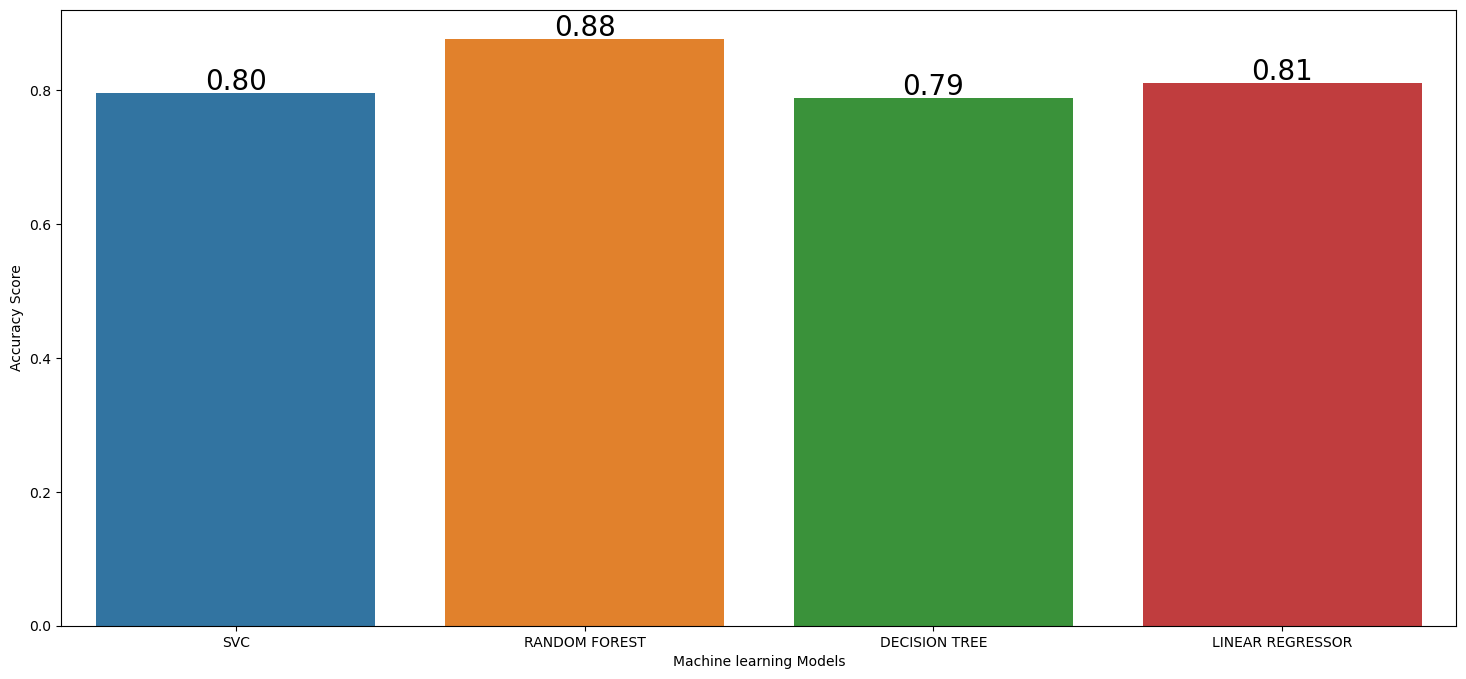

In [158]:
#Creating a DataFrame
x=pd.DataFrame({
    "Machine learning Models":["SVC","RANDOM FOREST","DECISION TREE","LINEAR REGRESSOR"],
    "Accuracy Score":[r2_svr,r2_rf,r2_dtr,LR_r2]
})

#plotting the Bar Plot
input
plt.figure(figsize=(18,8))
bar_plot=sns.barplot(y="Accuracy Score",x="Machine learning Models",data=x)

#Annotation the bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(),'.2f'),
                      (bar.get_x()+ bar.get_width() / 2, bar.get_height()),
                      ha="center" , va="center" , size=20, xytext=(0,8),
                      textcoords="offset points")
#(bar.get_height())-denote the x,y coordinates
#offset points is used too improving the readability
#sorting the dataframe by the accuracy score
x.sort_values(by="Accuracy Score",ascending=True)

In [109]:
print("RANDOM FOREST REGRESSOR HAS HIGH ACCURACY SCORE")

RANDOM FOREST REGRESSOR HAS HIGH ACCURACY SCORE
